### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create *python* code explicitly demonstrating your explanation using *numpy* and *scipy.stats* <br>

The model expressed as: $Y_i$ = $β_0$ + $β_1$$x_i$ + $ϵ_i$

- **Predictor $x_i$:** These are known or fixed values that represent the input variables in our model.
- **Intercept $β_0$:** This is the expected value of 𝑌 when 𝑥 = 0. It’s the point where the regression line crosses the y-axis.
- **Slope $β_1$:** This indicates the amount by which 𝑌 changes for a one-unit change in 𝑥. It describes the strength and direction of the relationship between 𝑥 and 𝑌.
- **Error Term $ϵ_i$:** These values show the difference between the actual values of 𝑌 and the values predicted by the model. We assume that $ϵ_i$ follows a normal distribution with mean 0 and standard deviation 𝜎, so they're random variations around the regression line.

The model describes each $Y_i$ as a sample from a normal distribution centered around the line $β_0$ + $β_1$$x_i$ with variance $σ^2$. When visualizing, we see the line defined by $β_0$ + $β_1$$x_i$, with $Y_i$ values scattered around it due to the random errors $ϵ_i$.

In [21]:
import numpy as np
from scipy.stats import norm, uniform
import plotly.graph_objects as go

# Parameters for the model
n = 100  # Number of samples
beta0 = 2.0  # Intercept
beta1 = 0.5  # Slope
sigma = 1.0  # Standard deviation of errors

# Generate predictor values x_i (uniformly distributed between 0 and 10)
x = uniform.rvs(0, 10, size=n)

# Generate error terms epsilon_i (normally distributed with mean 0 and sd sigma)
errors = norm.rvs(0, sigma, size=n)

# Calculate outcome values Y_i based on the Simple Linear Model
Y = beta0 + beta1 * x + errors

# Plot the data points and the theoretical regression line
fig = go.Figure()

# Add the data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Add the theoretical regression line without the error term
x_line = np.linspace(min(x), max(x), 100)
y_line = beta0 + beta1 * x_line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='Theoretical Line'))

# Set plot title and labels
fig.update_layout(title="Simple Linear Regression: Data Points and Theoretical Line",
                  xaxis_title="Predictor x",
                  yaxis_title="Outcome Y")

fig.show()


### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*<br>

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf  

# Simulate data for Simple Linear Regression model
n = 100  # Number of samples
beta0 = 2.0  # Intercept
beta1 = 0.5  # Slope
sigma = 1.0  # Standard deviation of errors

# Generate predictor values x_i (uniformly distributed between 0 and 10)
x = np.random.uniform(0, 10, n)

# Generate error terms epsilon_i (normally distributed with mean 0 and sd sigma)
errors = np.random.normal(0, sigma, n)

# Calculate outcome values Y_i based on the Simple Linear Model
Y = beta0 + beta1 * x + errors

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

# what do each of the following provide?
fitted_model.summary()  # simple explanation? 
fitted_model.summary().tables[1]  # simple explanation?
fitted_model.params  # simple explanation?
fitted_model.params.values  # simple explanation?
fitted_model.rsquared  # simple explanation?

# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; *but, hint though: simulation of random sampling variation*<br>

In [4]:
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

- The theoretical line reflects the true model used to generate the data, showing the ideal relationship without any influence from randomness.
- The fitted line reflects the model estimated from the sample data and thus includes the effects of sampling variability and noise.

### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*)<br>

In a Simple Linear Regression model, the fitted values ($\hat{y}_i$) represent the predicted values for the outcome variable based on the estimated model parameters. These fitted values are derived using the estimated intercept ($\hat{\beta}_0$) and slope ($\hat{\beta}_1$) coefficients.

$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$
- $\hat{\beta}_0$ (intercept) and $\hat{\beta}_1$ (slope) are obtained from the regression model after fitting it to the data.
- These values are derived from `fitted_model.params` or `fitted_model.params.values`, which return the estimated coefficients.
- The `fitted_model.fittedvalues` are computed by applying these estimated coefficients to the predictor variable $x_i$ across all observations.

`fitted_model.fittedvalues` are derived:
1. Model fitting: This calculates the estimated coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ based on minimizing the sum of squared residuals between observed 𝑌 and predicted $\hat{y}$.
2. Access coefficient: `fitted_model.params` or `fitted_model.params.values` provide these estimated coefficients directly.
3. Calculating fitted values: Calculate by substituting the value into the model equation.

### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by *trendline='ols'* and *smf.ols(...).fit()*) and why it requires "squares"<br>

In the "ordinary least squares" method, the fitted line is chosen to minimize the sum of the squared differences between the observed data points and the predicted values from the line. The reason it involves "squares" is that squaring the residuals (the differences between observed and predicted values) serves two purposes: it makes all residuals positive (so they don't cancel out) and emphasizes larger errors more than smaller ones, leading to a line that best captures the overall trend of the data while minimizing large deviations.

### 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. _fitted_model.fittedvalues_)"; and therefore, why _fitted_model.rsquared_ can be interpreted as a measure of the accuracy of the model; and, therefore what the two _np.corrcoef(...)[0,1]\*\*2_ expressions capture in the context of _Simple Linear Regression models_.

1. `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`: represents the proportion of total variation in the outcome 𝑌 that is explained by the model. The numerator is the Residual Sum of Squares(RSS), which measures the variation in 𝑌 that is not explained by the model (i.e., the prediction errors). The denominator is the Total Sum of Squares(TSS), which represents the total variation in 𝑌 from its mean. Subtracting the ratio 𝑅𝑆𝑆/𝑇𝑆𝑆 from 1 yields the proportion of total variation explained by the model. This value is called $R^2$ and is interpreted as the "goodness of fit" of the model.
2. `fitted_model.rsquared`: This is the `R^2` value directly calculated by the OLS regression model. It gives the proportion of variance in the dependent variable 𝑌 that is predictable from the independent variable 𝑥. Higher values (closer to 1) indicate a model that explains a large proportion of the variance, implying better fit.
3. Correlation Coefficients and $R^2$: 
- `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2`: This computes the square of the Pearson correlation coefficient between the observed 𝑌 values and the fitted (predicted) values $\hat Y$. Squaring the correlation coefficient gives $R^2$, showing the proportion of the variance in 𝑌 that is predictable from $\hat Y$.
- `np.corrcoef(Y,x)[0,1]**2`: This computes the square of the Pearson correlation coefficient between the outcome 𝑌 and the predictor 𝑥. In the context of Simple Linear Regression, this value also represents $R^2$, as the model is based on the linear relationship between 𝑥 and 𝑌. It shows the proportion of variance in 𝑌 that can be explained directly by 𝑥.

### 7. Indicate a couple of the assumptions of the *Simple Linear Regression* model specification that do not seem compatible with the example data below<br>

In [5]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Linearity:
- Assumption: The relationship between the independent variable 𝑥(amount of fertilizer) and the dependent variable 𝑌(crop yield) should be linear.
- Observation: From the scatter plot (`fig1`), it appears that the data might not exhibit a linear relationship. Instead, it shows a more complex pattern, such as a potential exponential or polynomial increase. This violates the linearity assumption.
2. Homoscedasticity:
- Assumption: The variance of the residuals should remain constant across all values of 𝑥.
- Observation: If the residuals histogram (`fig2`) or scatter plot of residuals (not shown but implied) indicates a pattern where the variance changes with 𝑥, it would mean heteroscedasticity is present. For example, if the residuals increase in spread as the amount of fertilizer increases, this suggests the model's errors do not have constant variance, violating the homoscedasticity assumption.
3. Normality of Residuals:
- Assumption: The residuals should be normally distributed for valid inference.
- Observation: If the residuals histogram does not show a bell-shaped, symmetrical distribution, this suggests that the residuals are not normally distributed. This could affect the accuracy of hypothesis tests and confidence intervals.
4. Independence of Errors: 
- Assumption: The residuals should be independent of each other.
- Observation: This assumption might be harder to assess directly from a plot but can be inferred if there are patterns or trends in the residuals over time or another sequential factor. If, for example, there are systematic changes in residuals as 𝑥 increases, this could imply a dependency.

### 8. Specify a *null hypothesis* of "no linear association (on average)" in terms of the relevant *parameter* of the *Simple Linear Regression* model, and use the code below to characterize the evidence in the data relative to the *null hypothesis* and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.<br>

- $H_0$: slope $β_1$ = 0
- $H_A$: slope $β_1$ ≠ 0

In [6]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        18:54:35   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Null Hypothesis ($H_0$): There is no linear relationship between the waiting time and the duration of eruptions at the Old Faithful Geyser ($β_1$ = 0).
- The p-value is less than 0.001 and close to 0, so we reject the null hypothesis, indicating very strong evidence of a linear relationship between waiting time and duration. This means that the longer the waiting time, the longer the eruption duration, on average.
Therefore, the results show strong statistical evidence that waiting time is a significant predictor of eruption duration at Old Faithful, with a positive linear relationship. 

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the *null hypothesis* in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.<br>

In [7]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


A p-value of 0.238 which is greater than 0.05 suggests no evidence against the null hypothesis at conventional significance levels. We fail to reject the null hypothesis, meaning we do not have enough evidence to claim that a linear relationship exists between waiting time and duration for the subset of data with short wait times. For short wait times (e.g., less than 62 minutes), the data does not provide sufficient evidence of a significant linear association between waiting time and eruption duration. This is in contrast to the findings for the full dataset, where a strong positive linear relationship was evident. While the full dataset shows a clear linear relationship between waiting time and eruption duration, this relationship does not hold when restricting the analysis to only short wait times. The p-value indicates that any observed slope could likely have occurred due to random variation in this subset of data.

### 10. Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to do the following:

1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models;  


2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of "no linear association (on average)"; then,  


3. report if $0$ is contained within a 95\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?<br><br>

In [8]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


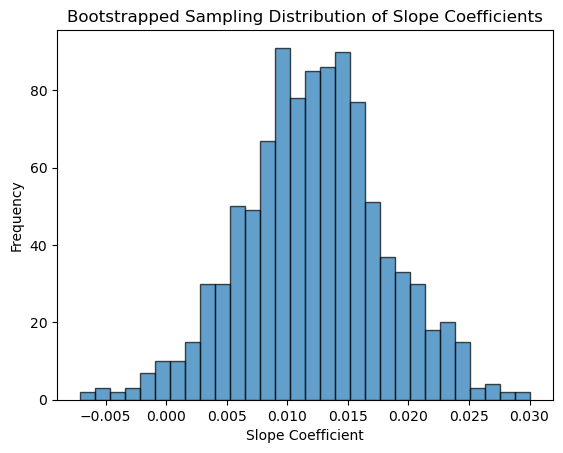

95% bootstrapped confidence interval for the slope: [0.00020292 0.02401597]


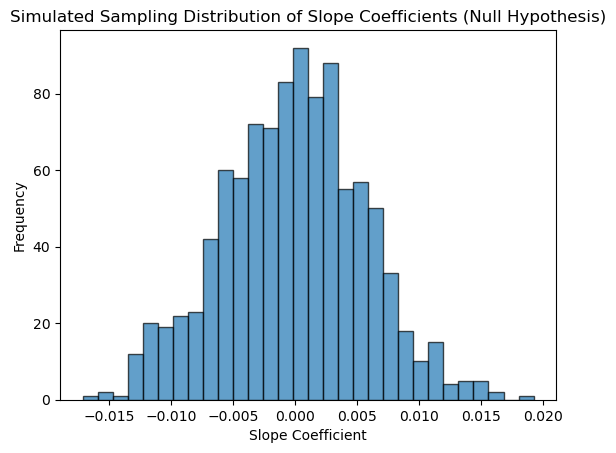

Does the 95% bootstrapped confidence interval contain 0? False
Simulated p-value: 0.032


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Filter data for long wait times
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Part 1: Bootstrap to estimate the slope coefficients
bootstrap_slope_coefficients = []

# Number of bootstrap samples
num_bootstrap_samples = 1000

for _ in range(num_bootstrap_samples):
    # Create a bootstrap sample
    bootstrap_sample = long_wait_data.sample(n=long_wait.sum(), replace=True)
    # Fit the linear regression model
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    # Collect the slope coefficient
    bootstrap_slope_coefficients.append(model.params['waiting'])

# Plot the bootstrap sampling distribution
plt.hist(bootstrap_slope_coefficients, bins=30, edgecolor='k', alpha=0.7)
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.show()

# 95% bootstrapped confidence interval
conf_interval = np.quantile(bootstrap_slope_coefficients, [0.025, 0.975])
print(f'95% bootstrapped confidence interval for the slope: {conf_interval}')

# Part 2: Simulate under the null hypothesis (β1 = 0)
simulated_slope_coefficients = []

# Simulate samples
for _ in range(num_bootstrap_samples):
    # Create a simulated dataset
    old_faithful_simulation = long_wait_data.copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + \
        stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    # Fit the linear regression model to the simulated data
    simulated_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    # Collect the slope coefficient
    simulated_slope_coefficients.append(simulated_model.params['waiting'])

# Plot the simulated sampling distribution
plt.hist(simulated_slope_coefficients, bins=30, edgecolor='k', alpha=0.7)
plt.title('Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.show()

# Part 3: Report if 0 is in the 95% confidence interval and calculate p-value
contains_zero = 0 >= conf_interval[0] and 0 <= conf_interval[1]
print(f'Does the 95% bootstrapped confidence interval contain 0? {contains_zero}')

# Calculate the p-value for the simulated slope coefficients
observed_slope = smf.ols('duration ~ waiting', data=long_wait_data).fit().params['waiting']
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print(f'Simulated p-value: {simulated_p_value}')


The result of hypothesis testing with confidence intervals is the same as that with p-value.

### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

### where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications<br>

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

### and report the evidence against a *null hypothesis* of "no difference between groups "on average") for the new *indicator variable* based model<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$
- This is a simple linear regression with a categorical variable as the predictor. The model uses an indicator variable that takes the value of 1 for "long" wait times and 0 for "short" wait times.
- The coefficient $β_contrast$ represents the difference in the average duration between "long" and "short" wait times.
1. `smf.ols('duration ~ waiting', data=old_faithful)`: 
- This model treats "waiting" as a continuous variable.
- It assesses the linear relationship between the waiting time and the duration across the entire dataset.
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`:
- This model uses only the subset of "short" wait times, fitting a linear relationship within that group.
- It does not account for "long" wait times.
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`: 
- This model is similar to the previous but only for the subset of "long" wait times.

In [14]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


- $β_i$: The average duration for "short" wait times.
- $β_c$: The difference in mean duration between "long" and "short" wait times.
- Null Hypothesis: There is no difference in mean duration between "short" and "long" wait times.
- Evidence Against the Null: If the p-value for $β_c$ is significant (typically 𝑝 < 0.05), we can reject the null hypothesis and conclude that there is a statistically significant difference between the groups.

### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of *error* terms is normal for each of the models, and explain why the other three do not support this assumption.

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**Supporting Model:**
- **Model 1 (All Data Using Slope)** 
- The histogram for this model appears mostly symmetric around zero and closely follows the overlaid normal distribution curve, suggests that the residuals are approximately normally distributed, supporting the assumption of normality.

**Non-Supporting Models:**
- **Model 2 (Short Wait Data)**: The histogram shows slight skewness and does not align as well with the normal distribution curve. There may be evidence of a heavy tail or an uneven distribution. This indicates that the residuals for short wait times do not support the normality assumption as strongly as Model 1.
- **Model 3 (Long Wait Data)**: The histogram for long wait data may exhibit skewness or a distribution that deviates from a bell-shaped curve. Peaks or heavy tails can be present, suggesting a departure from normality. So it does not meet the normality assumption as closely as desired.
- **Model 4 (All Data Using Indicator)**: Depending on the observed distribution, this model may or may not support the normality assumption. If there are significant deviations from symmetry or heavy tails, the normality assumption is violated.

### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) *hypothesis test*; but, we can do "two sample" hypothesis testing using a *permuation test*, or create a 95% *bootstrap confidence interval* for the difference in means of the two populations. 

### (A) Do a permuation test $\;H_0: \mu_{\text{short}}=\mu_{\text{long}} \; \text{ no difference in duration between short and long groups}$ by "shuffling" the labels

In [16]:
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
permutation_diffs = []

for _ in range(10000):
    shuffled = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1, replace=False).values)
    diff = shuffled.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permutation_diffs.append(diff)

p_value = (np.abs(permutation_diffs) >= np.abs(observed_diff)).mean()

### (B) Create a 95% bootstrap confidence interval  by repeatedly bootstrapping within each group and applying *np.quantile(bootstrapped_mean_differences, [0.025, 0.975])* to the collection of differences between the sample means.    

In [17]:
bootstrapped_diffs = []

for _ in range(10000):
    bootstrapped = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    diff = bootstrapped.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_diffs.append(diff)

ci_95 = np.quantile(bootstrapped_diffs, [0.025, 0.975])

# Output results
print(f"Observed mean difference: {observed_diff}")
print(f"Permutation test p-value: {p_value}")
print(f"95% Bootstrap CI: {ci_95}")

Observed mean difference: 2.20360023255814
Permutation test p-value: 0.0
95% Bootstrap CI: [2.10186918 2.30123425]


### (a) Explain how the sampling approaches work for the two simulations.

- **Permutation Test:** Checks if the observed mean difference could occur by chance under the null hypothesis by shuffling labels. This maintains the original data distribution but randomizes group assignments.
- **Bootstrapping:** Involves resampling within the original groups to simulate possible samples and estimate the distribution of the mean difference.

### (b) Compare and contrast these two methods with the *indicator variable* based model approach used in Question 11, explaining how they're similar and different.<br>

- **Similarities:** Both the permutation test and bootstrapping assess differences between groups without assuming normality.
- **Differences:** 
- **Indicator Variable Model:** Tests for the average effect of being in the "long" group compared to "short" through a regression approach.
- **Permutation/Bootstrapping:** Non-parametric methods that rely on data shuffling or resampling, providing robust estimates without assuming specific model structures.

### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>


I haven't read the book yet, but I've chatted with ChatBot.


---

**Summary of Our Exchanges:**

1. **Data Overview and Initial Analysis:**
   We began by discussing how to analyze the Old Faithful dataset, focusing on separating wait times into "short" and "long" categories. Initial exploratory data analysis included creating scatter plots and fitting linear regression models using statsmodels (`smf.ols()`).

2. **Bootstrapping and Hypothesis Testing:**
   You worked on generating bootstrap samples for visualizing the distribution of slope coefficients and creating simulations under the null hypothesis (β1 = 0). We discussed how to create bootstrapped confidence intervals and calculate p-values using custom resampling techniques.

3. **Indicator Variable Model:**
   You explored an indicator variable model for categorizing wait times into "short" and "long" groups, comparing it to simple linear regression models applied to different data subsets. This model helped analyze differences between groups using categorical data.

4. **Residual Analysis:**
   Histograms of model residuals were generated to assess normality assumptions. We examined the distributional shape of residuals from four models, comparing them against a theoretical normal distribution to determine plausibility.

5. **Permutation Test and Bootstrapped Confidence Intervals:**
   We discussed two-sample hypothesis testing techniques: permutation tests and bootstrap confidence intervals for comparing mean durations between "short" and "long" wait time groups. Code was provided for resampling and calculating mean differences through these methods.

6. **Comparison and Analysis:**
   We explained the sampling approaches, emphasizing the shuffling of labels for permutation tests and resampling within groups for bootstrapping. A comparative analysis highlighted the differences between these methods and the indicator variable model used previously.

7. **Guidance and Code Implementation:**
   Throughout, we reviewed Python code involving `pandas`, `numpy`, `statsmodels`, `scipy`, and `plotly` to support data analysis, visualization, and statistical tests. This included structured for-loops for repeated sampling and custom functions for calculating statistics.

https://chatgpt.com/share/672d41a3-48a0-8004-9e96-f453a0bf9e42 Chat log history